# 5 EDA III: Advanced Graphics

Reading the book [Humanities Data and R](http://humanitiesdata.org)

## 5.2 Output formats

In [1]:
mm = 1/25.4

In [2]:
pdf(file="test.pdf", width=100*mm, height=100*mm)
plot(c(1,3,5, 6, 4, 2), c(2,4,6, 5, 3, 1))
dev.off()

pdf 
  2

In [3]:
png(file="test.png", width=1000, height=1000)
plot(c(1,3,5, 6, 4, 2), c(2,4,6, 5, 3, 1))
dev.off()

pdf 
  2

In [4]:
help(pdf)

pdf {grDevices},R Documentation
file,"a character string giving the name of the file. If it is of the form ""|cmd"", the output is piped to the command given by cmd. If it is NULL, then no external file is created (effectively, no drawing occurs), but the device may still be queried (e.g., for size of text). For use with onefile = FALSE give a C integer format such as ""Rplot%03d.pdf"" (the default in that case). (See postscript for further details.) Tilde expansion (see path.expand) is done."
"width, height",the width and height of the graphics region in inches. The default values are 7.
onefile,"logical: if true (the default) allow multiple figures in one file. If false, generate a file with name containing the page number for each page. Defaults to TRUE, and forced to true if file is a pipe."
family,"the font family to be used, see postscript. Defaults to ""Helvetica""."
title,"title string to embed as the /Title field in the file. Defaults to ""R Graphics Output""."
fonts,a character vector specifying R graphics font family names for additional fonts which will be included in the PDF file. Defaults to NULL.
version,"a string describing the PDF version that will be required to view the output. This is a minimum, and will be increased (with a warning) if necessary. Defaults to ""1.4"", but see ‘Details’."
paper,"the target paper size. The choices are ""a4"", ""letter"", ""legal"" (or ""us"") and ""executive"" (and these can be capitalized), or ""a4r"" and ""USr"" for rotated (‘landscape’). The default is ""special"", which means that the width and height specify the paper size. A further choice is ""default""; if this is selected, the papersize is taken from the option ""papersize"" if that is set and as ""a4"" if it is unset or empty. Defaults to ""special""."
encoding,"the name of an encoding file. See postscript for details. Defaults to ""default""."
bg,"the initial background color to be used. Defaults to ""transparent""."


## 5.3 Color

In [5]:
election = read.csv(
    "data/ch05/france_election_2012.csv",
    as.is=TRUE,
)

In [6]:
head(election)
dim(election)

,department,HOLLANDE,SARKOZY,LE.PEN,MELENCHON,BAYROU,JOLY,DUPONT.AIGNAN,POUTOU,ARTHAUD,CHEMINADE,HOLLANDE_2,SARKOZY_2
1,Paris,34.83,32.19,6.2,11.09,9.34,4.18,1,0.67,0.27,0.23,55.6,44.4
2,Seine-et-Marne,27.65,27.27,19.65,11.01,8.55,1.96,2.18,1.02,0.46,0.26,49.25,50.75
3,Yvelines,27.32,34.24,12.44,9.11,11.24,2.5,1.73,0.8,0.35,0.28,45.7,54.3
4,Essonne,30.39,25.46,15.2,12.26,9.33,2.35,3.41,0.94,0.41,0.24,53.43,46.57
5,Hauts-de-Seine,30.16,34.97,8.51,10.35,10.69,2.74,1.34,0.69,0.3,0.26,49.48,50.52
6,Seine-Saint-Denis,38.68,19.48,13.55,16.99,6.12,2.21,1.31,0.92,0.51,0.24,65.32,34.68


[1] 107  13

In [7]:
otherVotes = apply(election[, 4:11], 1, sum)
head(otherVotes)

[1] 32.98 45.09 38.45 44.14 34.88 41.85

In [8]:
cuts = quantile(otherVotes, probs=seq(0,1,length.out=11))
cuts

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
14.050 34.392 42.236 43.494 44.198 45.410 46.386 47.258 48.214 49.210 51.040

In [9]:
bins = cut(otherVotes, cuts, include.lowest=TRUE, labels=FALSE)

In [10]:
bins

[1]  1  5  2  4  2  2  2  2  7  7  6  9  9  9  8  8  6  9  5  6  4  7  5  3  4
 [26]  6  4  5  5  9  8  9  8 10 10 10  7  9  5 10  9 10  2  3  3  6  3  3  2  2
 [51]  4  4  3  2  4  5  3  3  8  7  7  5  5  4  4  7  6  7  2  4  5  7 10  9  7
 [76]  9  3  8  5  6  2  9  6  8 10  8  7  9 10 10  4  8  6 10  6  3  1  1  1  1
[101]  8  1  1  1  1  1  1

In [11]:
library(colorspace)

In [12]:
heat_hcl(n=10)

[1] "#D33F6A" "#DA565E" "#E06B50" "#E57E41" "#E89132" "#EAA428" "#E9B62D"
 [8] "#E8C842" "#E5D961" "#E2E6BD"

In [20]:
help(heat_hcl)

rainbow_hcl {colorspace},R Documentation
n,the number of colors (>= 1) to be in the palette.
"c, c.",chroma value in the HCL color description.
l,luminance value in the HCL color description.
start,the hue at which the rainbow begins.
end,the hue at which the rainbow ends.
h,"hue value in the HCL or HSV color description, has to be in [0, 360] for HCL and in [0, 1] for HSV colors."
s,saturation value in the HSV color description.
v,value value in the HSV color description.
power,"control parameter determining how chroma and luminance should be increased (1 = linear, 2 = quadratic, etc.)."
gamma,Deprecated.


In [13]:
heatPalette = heat_hcl(10)[10:1]
cols = heatPalette[bins]

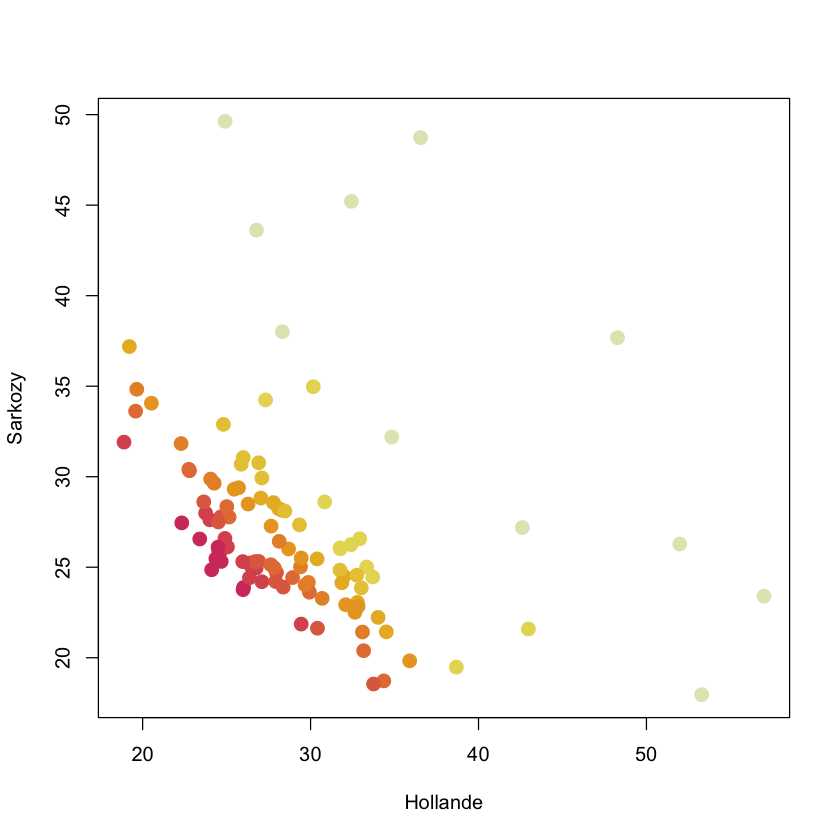

In [14]:
plot(
    election$HOLLANDE, election$SARKOZY,
    col=cols,
    pch=19,
    cex=1.5,
    xlab="Hollande",
    ylab="Sarkozy",
)

In [15]:
percRemain = (election$HOLLANDE_2 - election$HOLLANDE) /
             (100 - election$HOLLANDE - election$SARKOZY)
head(percRemain)

[1] 0.6297756 0.4791482 0.4781478 0.5218573 0.5540579 0.6367113

In [16]:
index = percRemain < 0.5
cutsLower = quantile(percRemain[index], probs=seq(0,1, length.out=11))
index = percRemain >= 0.5
cutsUpper = quantile(percRemain[index], probs=seq(0,1, length.out=11))
cuts = c(cutsLower, cutsUpper)
cuts
bins = cut(percRemain, cuts, include.lowest=TRUE, labels=FALSE)
len(cuts)

0%       10%       20%       30%       40%       50%       60%       70% 
0.3613821 0.4161632 0.4340408 0.4527129 0.4627394 0.4721817 0.4772551 0.4818796 
      80%       90%      100%        0%       10%       20%       30%       40% 
0.4859240 0.4926577 0.4978733 0.5001059 0.5125271 0.5231833 0.5351469 0.5482774 
      50%       60%       70%       80%       90%      100% 
0.5606758 0.5760597 0.5874583 0.6174553 0.6376925 0.8498641

ERROR: Error in eval(expr, envir, enclos): could not find function "len"


Below we should generate 21 colors, because we have 22 cuts, so we need 21 colors.
If we take 20 colors, the bins that have value 21 will get color `NA`.

In [17]:
divPalette = diverge_hcl(21, alpha=0.5)
divPalette
cols = divPalette[bins]

[1] "#023FA580" "#3F56A680" "#5D6CAE80" "#7681B680" "#8C94BF80" "#A1A6C880"
 [7] "#B3B7CF80" "#C4C6D680" "#D2D3DC80" "#DCDDE080" "#E2E2E280" "#E0DCDD80"
[13] "#DDD0D280" "#D8C1C580" "#D2B0B680" "#CA9CA480" "#C1869280" "#B76E7D80"
[19] "#AB546880" "#9D375280" "#8E063B80"

In [18]:
cols

[1] "#9D375280" "#B3B7CF80" "#B3B7CF80" "#DDD0D280" "#CA9CA480" "#9D375280"
  [7] "#B76E7D80" "#DDD0D280" "#D2D3DC80" "#3F56A680" "#5D6CAE80" "#5D6CAE80"
 [13] "#DDD0D280" "#7681B680" "#D2B0B680" "#B3B7CF80" "#CA9CA480" "#C1869280"
 [19] "#8C94BF80" "#C1869280" "#D8C1C580" "#C4C6D680" "#7681B680" "#CA9CA480"
 [25] "#DDD0D280" "#DCDDE080" "#A1A6C880" "#B76E7D80" "#E0DCDD80" "#A1A6C880"
 [31] "#D8C1C580" "#CA9CA480" "#D8C1C580" "#7681B680" "#5D6CAE80" "#D2D3DC80"
 [37] "#023FA580" "#023FA580" "#C4C6D680" "#E0DCDD80" "#B3B7CF80" "#D2D3DC80"
 [43] "#B76E7D80" "#E0DCDD80" "#C4C6D680" "#D2B0B680" "#8C94BF80" "#AB546880"
 [49] "#AB546880" "#C1869280" "#D2B0B680" "#AB546880" "#D8C1C580" "#C1869280"
 [55] "#B76E7D80" "#AB546880" "#C1869280" "#C1869280" "#E0DCDD80" "#B76E7D80"
 [61] "#8E063B80" "#CA9CA480" "#B76E7D80" "#C1869280" "#9D375280" "#9D375280"
 [67] "#D2B0B680" "#E2E2E280" "#9D375280" "#AB546880" "#9D375280" "#3F56A680"
 [73] "#D2B0B680" "#DCDDE080" "#DDD0D280" "#DCDDE080" "#DCDDE080" "#D2D3DC80"
 [79] "#3F56A680" "#AB546880" "#DDD0D280" "#E0DCDD80" "#AB546880" "#D2B0B680"
 [85] "#C4C6D680" "#DDD0D280" "#D8C1C580" "#E0DCDD80" "#D8C1C580" "#D8C1C580"
 [91] "#023FA580" "#8C94BF80" "#023FA580" "#3F56A680" "#5D6CAE80" "#7681B680"
 [97] "#8E063B80" "#8E063B80" "#8E063B80" "#9D375280" "#8E063B80" "#8C94BF80"
[103] "#8E063B80" "#CA9CA480" "#8E063B80" "#A1A6C880" "#CA9CA480"

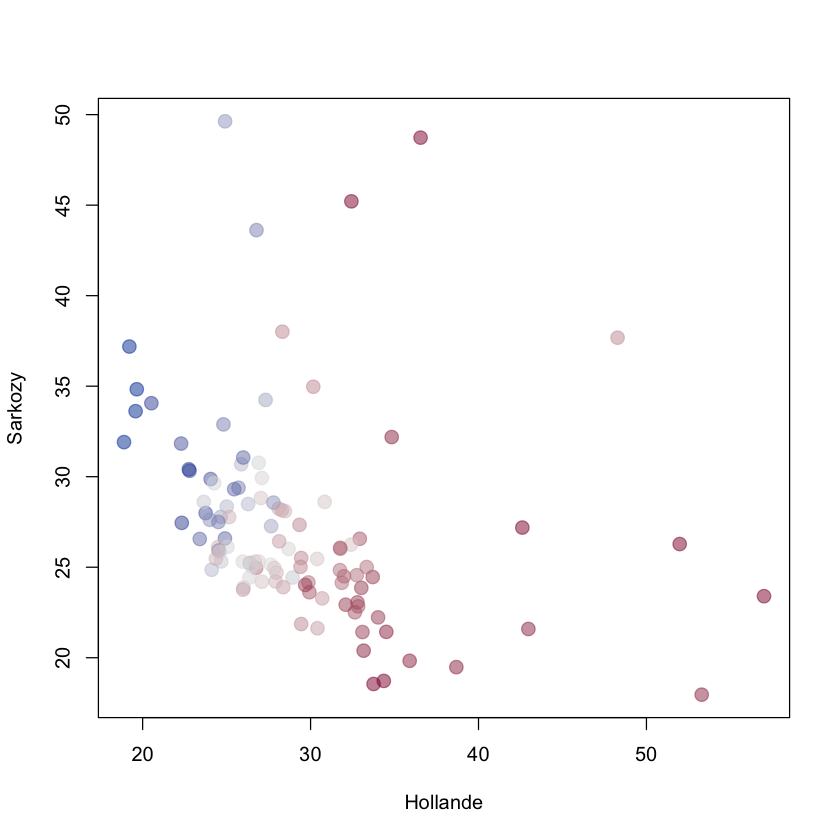

In [19]:
plot(
    election$HOLLANDE, election$SARKOZY,
    col=cols,
    pch=19,
    cex=1.5,
    xlab="Hollande",
    ylab="Sarkozy",
)

In [27]:
whichThirdParty = apply(election[,4:11],1,which.max)
head(whichThirdParty)

[1] 2 1 1 1 3 2

In [26]:
table(whichThirdParty)

whichThirdParty
 1  2  3 
94  7  6 

In [31]:
categoricalPalette = rainbow_hcl(3, alpha=0.5)
cols = categoricalPalette[whichThirdParty]

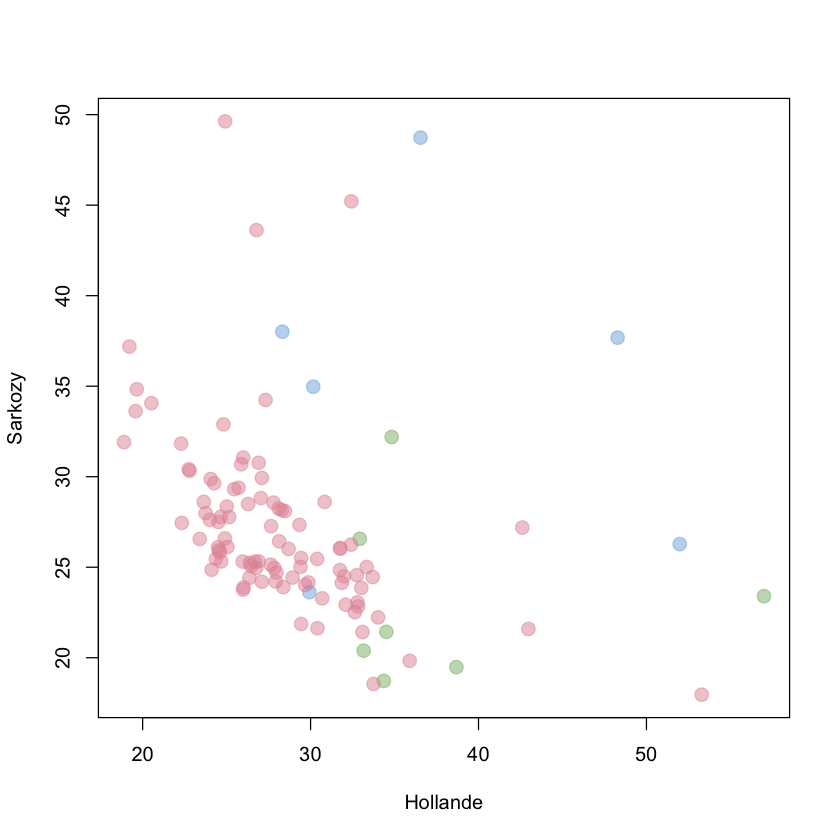

In [32]:
plot(
    election$HOLLANDE, election$SARKOZY,
    col=cols,
    pch=19,
    cex=1.5,
    xlab="Hollande",
    ylab="Sarkozy",
)

## 5.4 Legends

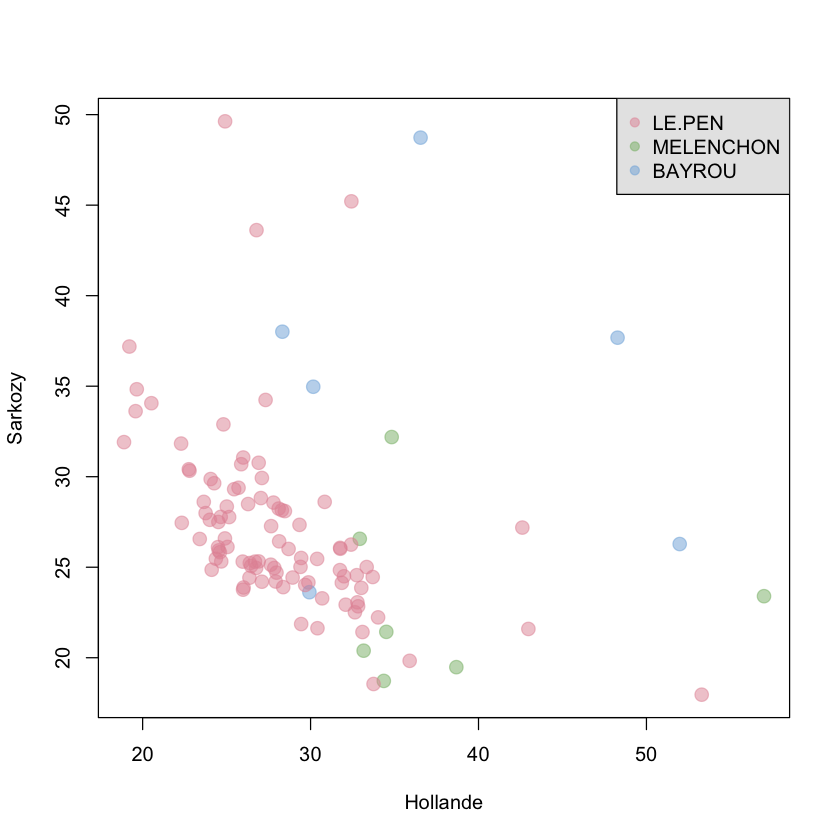

In [33]:
plot(
    election$HOLLANDE, election$SARKOZY,
    col=cols,
    pch=19,
    cex=1.5,
    xlab="Hollande",
    ylab="Sarkozy",
)
legend(
    "topright",
    legend=colnames(election)[4:6],
    col=categoricalPalette,
    pch=19,
    cex=1,
    bg=grey(0.9)
)

In [55]:
otherVotes = apply(election[,4:11], 1, sum)
cuts = quantile(otherVotes, probs=seq(0,1, length.out=11))
bins = cut(otherVotes, cuts, include.lowest=TRUE, labels=FALSE)
cols = heatPalette[bins]

In [65]:
cuts = round(cuts[11:1])
cuts

100%  90%  80%  70%  60%  50%  40%  30%  20%  10%   0% 
  51   49   48   47   46   45   44   43   42   34   14

In [66]:
legendLabels = paste(cuts[-1], "-", cuts[-length(cuts)], "%", sep="")
legendLabels

[1] "49-51%" "48-49%" "47-48%" "46-47%" "45-46%" "44-45%" "43-44%" "42-43%"
 [9] "34-42%" "14-34%"

The legend labels are listed in reverse order.
So, in the legend function, we also have to give the colors in the reversed order. The book does not do it, and that is an error.
If we reverse the color sequence (``heatPalette[0:1]`` below), the graphics comes oout just as in the book.

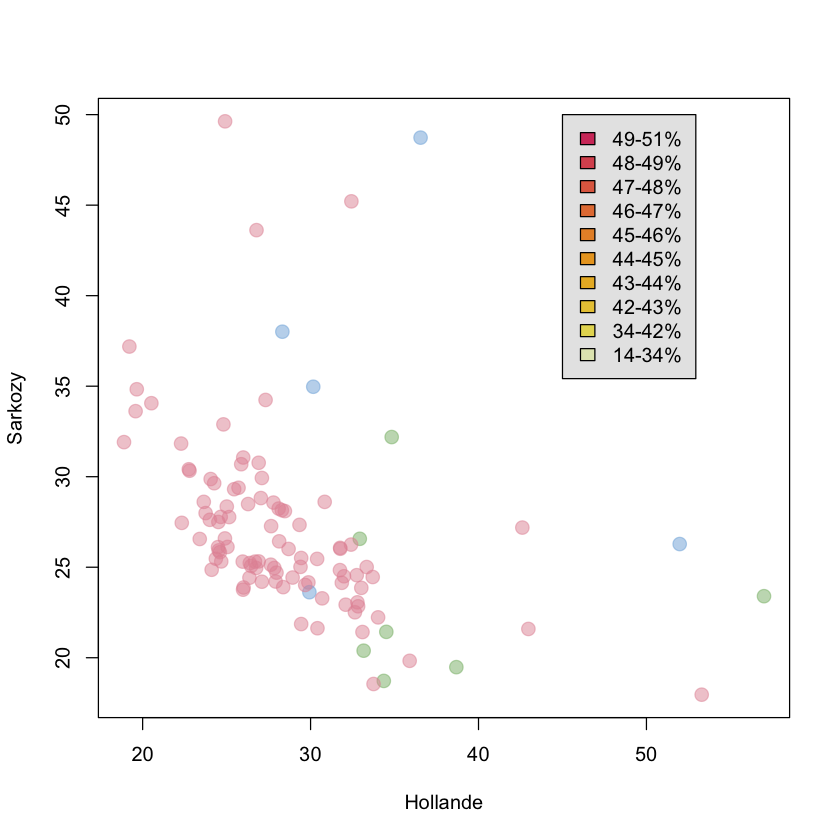

In [101]:
plot(
    election$HOLLANDE, election$SARKOZY,
    col=cols,
    pch=19,
    cex=1.5,
    xlab="Hollande",
    ylab="Sarkozy",
)
legend(
    45, 50,
    legend=legendLabels,
    fill=heatPalette[10:1],
    bg=grey(0.9)
)

## 5.5 Randomness

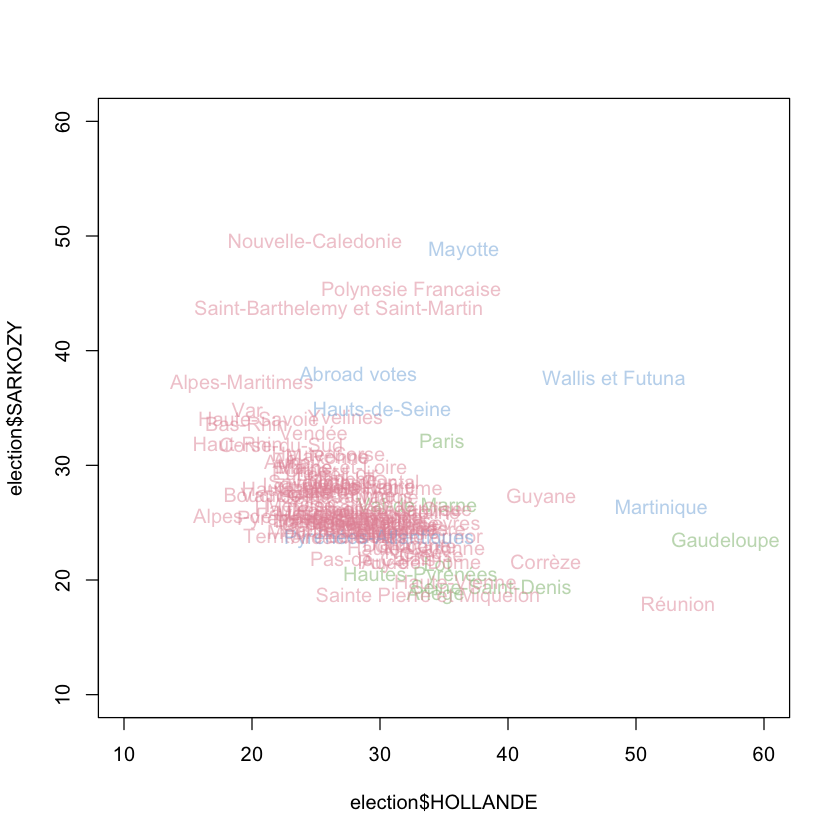

In [92]:
cols = categoricalPalette[whichThirdParty]
plot(
    election$HOLLANDE,
    election$SARKOZY,
    col="white",
    pch=19,
    cex=2,
    xlim=c(10,60),
    ylim=c(10,60)
)
text(
    election$HOLLANDE,
    election$SARKOZY,
    election$department,
    col=cols,
)

In [102]:
set.seed(42)
index = which(whichThirdParty %in% c(2,3))
index = c(index, sample(which(whichThirdParty == 1), 15))

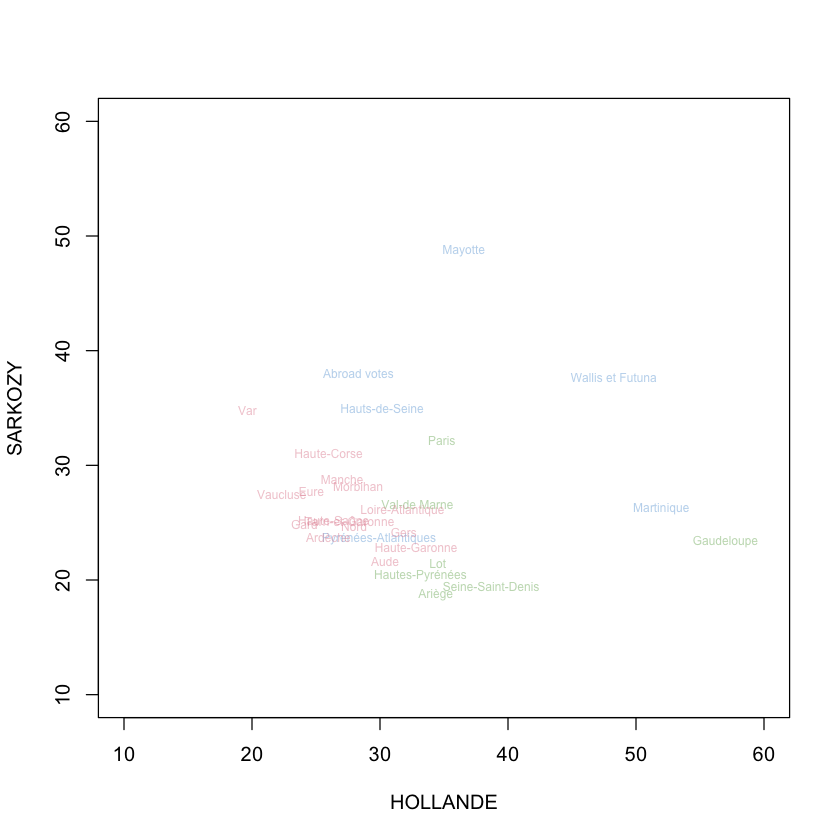

In [103]:
plot(
    election$HOLLANDE,
    election$SARKOZY,
    col="white",
    pch=19,
    cex=2,
    xlim=c(10,60),
    ylim=c(10,60),
    xlab='HOLLANDE',
    ylab='SARKOZY',
)
text(
    election$HOLLANDE[index],
    election$SARKOZY[index],
    election$department[index],
    col=cols[index],
    cex=0.6,
)

In [104]:
location = round(election$SARKOZY/2) + round(election$HOLLANDE/10) * 100
location

[1] 316 314 317 313 317 410 313 313 312 215 215 214 312 213 312 214 313 312
 [19] 315 312 314 314 315 314 314 215 314 311 313 214 312 311 312 213 213 213
 [37] 217 216 314 213 313 312 313 315 315 313 216 312 312 313 314 312 314 313
 [55] 312 311 312 312 313 312 309 313 311 312 311 310 312 313 411 311 410 215
 [73] 312 313 312 313 315 214 217 312 314 312 311 311 212 313 314 313 213 213
 [91] 219 214 217 214 216 316 612 513 414 509 309 322 424 519 323 225 319

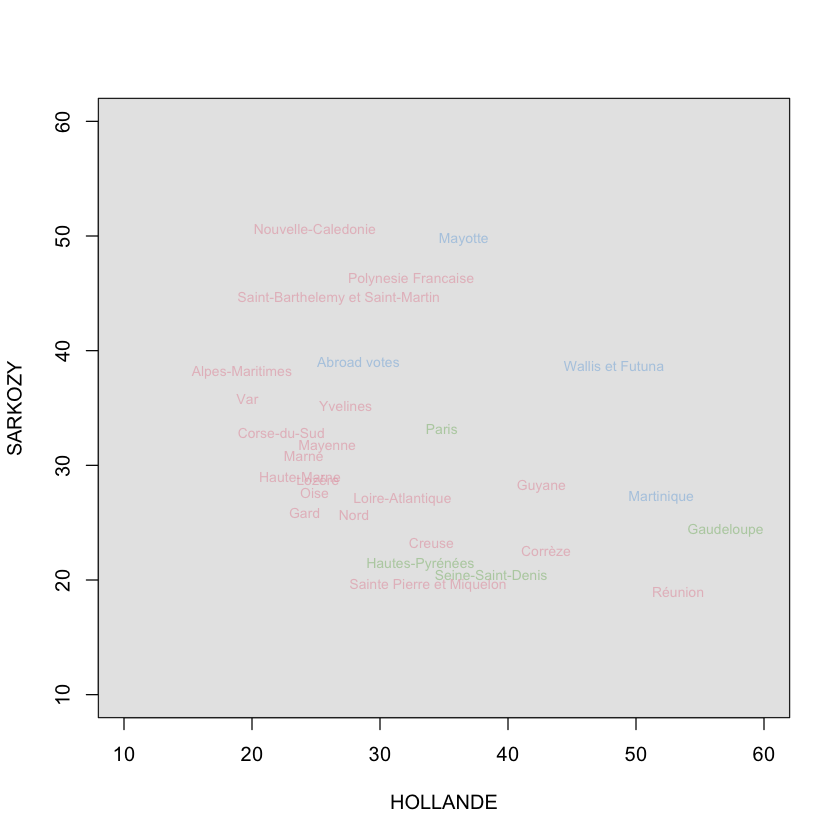

In [108]:
colsAlpha = rainbow_hcl(3, alpha=0.2)[whichThirdParty]
plot(
    election$HOLLANDE,
    election$SARKOZY,
    pch=19,
    cex=0.5,
    col=colsAlpha,
    xlim=c(10,60),
    ylim=c(10,60),
    xlab='HOLLANDE',
    ylab='SARKOZY',
)
index = c()
set.seed(42)
for (i in sample(1:nrow(election))) {
    if (!(location[i] %in% index)) {
        text(
            election$HOLLANDE[i],
            election$SARKOZY[i]+1,
            election$department[i],
            col=cols[i],
            cex=0.7
        )
        index = c(index, location[i])
    }
}

## 5.6 Additional Parameters

In [105]:
par()

$xlog
[1] FALSE

$ylog
[1] FALSE

$adj
[1] 0.5

$ann
[1] TRUE

$ask
[1] FALSE

$bg
[1] "transparent"

$bty
[1] "o"

$cex
[1] 1

$cex.axis
[1] 1

$cex.lab
[1] 1

$cex.main
[1] 1.2

$cex.sub
[1] 1

$cin
[1] 0.15 0.20

$col
[1] "black"

$col.axis
[1] "black"

$col.lab
[1] "black"

$col.main
[1] "black"

$col.sub
[1] "black"

$cra
[1] 10.8 14.4

$crt
[1] 0

$csi
[1] 0.2

$cxy
[1] 0.02604167 0.03875969

$din
[1] 7 7

$err
[1] 0

$family
[1] ""

$fg
[1] "black"

$fig
[1] 0 1 0 1

$fin
[1] 7 7

$font
[1] 1

$font.axis
[1] 1

$font.lab
[1] 1

$font.main
[1] 2

$font.sub
[1] 1

$lab
[1] 5 5 7

$las
[1] 0

$lend
[1] "round"

$lheight
[1] 1

$ljoin
[1] "round"

$lmitre
[1] 10

$lty
[1] "solid"

$lwd
[1] 1

$mai
[1] 1.02 0.82 0.82 0.42

$mar
[1] 5.1 4.1 4.1 2.1

$mex
[1] 1

$mfcol
[1] 1 1

$mfg
[1] 1 1 1 1

$mfrow
[1] 1 1

$mgp
[1] 3 1 0

$mkh
[1] 0.001

$new
[1] FALSE

$oma
[1] 0 0 0 0

$omd
[1] 0 1 0 1

$omi
[1] 0 0 0 0

$page
[1] TRUE

$pch
[1] 1

$pin
[1] 5.76 5.16

$plt
[1] 0.1171429 0.9400000 0.1457143 0.8828571

$ps
[1] 12

$pty
[1] "m"

$smo
[1] 1

$srt
[1] 0

$tck
[1] NA

$tcl
[1] -0.5

$usr
[1] 0 1 0 1

$xaxp
[1] 0 1 5

$xaxs
[1] "r"

$xaxt
[1] "s"

$xpd
[1] FALSE

$yaxp
[1] 0 1 5

$yaxs
[1] "r"

$yaxt
[1] "s"

$ylbias
[1] 0.2

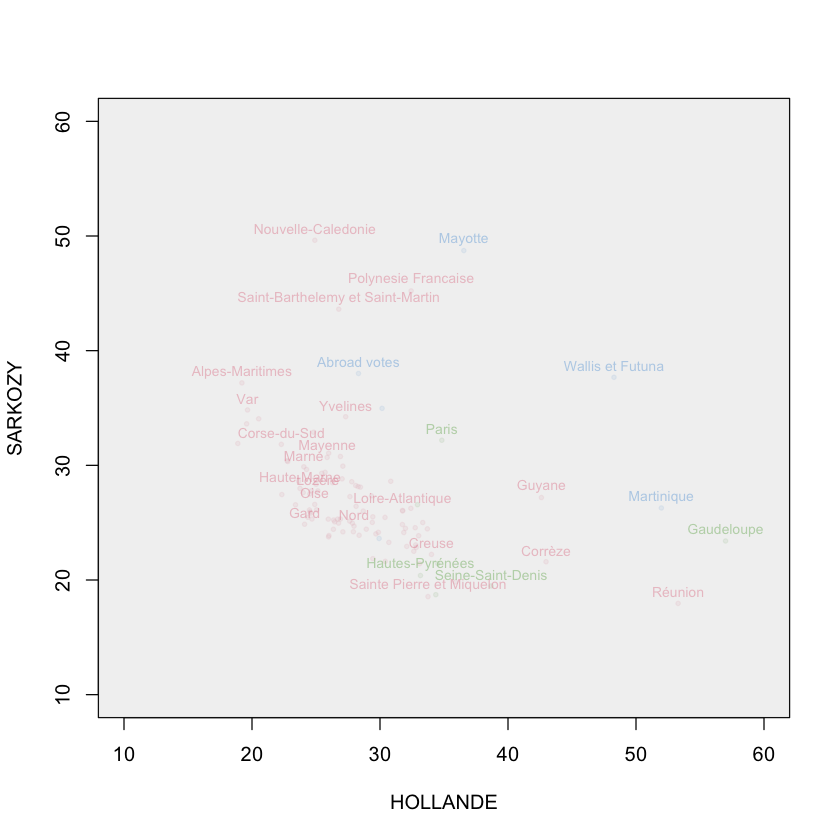

In [119]:
colsAlpha = rainbow_hcl(3, alpha=0.2)[whichThirdParty]
plot(
    election$HOLLANDE,
    election$SARKOZY,
    pch=19,
    cex=0.5,
    col=colsAlpha,
    xlim=c(10,60),
    ylim=c(10,60),
    xlab='HOLLANDE',
    ylab='SARKOZY',
)
rect(
    par('usr')[1],par('usr')[3],par('usr')[2],par('usr')[4],
    col=gray(0.9, alpha=0.5)
)
index = c()
set.seed(42)
for (i in sample(1:nrow(election))) {
    if (!(location[i] %in% index)) {
        text(
            election$HOLLANDE[i],
            election$SARKOZY[i]+1,
            election$department[i],
            col=cols[i],
            cex=0.7
        )
        index = c(index, location[i])
    }
}

## 5.7 Alternative methods

In [120]:
library(ggplot2)

In [129]:
help(package=ggplot2)